# (Dataset Exploration Title)
## by (your name here)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [405]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [406]:
df_trips = pd.read_csv("./Datasets/201902-fordgobike-tripdata.csv")
df_trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [407]:
df_trips.shape

(183412, 16)

In [408]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

## Data Wrangling

In [409]:
# Convert date / time fields to datetime data type
df_trips['start_time'] = pd.to_datetime(df_trips['start_time'])
df_trips['end_time'] = pd.to_datetime(df_trips['end_time'])

In [410]:
# Add duration in minutes column
df_trips['duration_min'] = df_trips['duration_sec'] / 60

In [411]:
# Add weekday for further analysis
import calendar
df_trips['weekday'] = df_trips['start_time'].apply(lambda x: calendar.day_name[x.weekday()])

# Order it
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekdays_classes = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
df_trips['weekday'] = df_trips['weekday'].astype(weekdays_classes);

In [412]:
# Create Age column
df_trips['age'] = df_trips['start_time'].apply(lambda x: x.year) - df_trips['member_birth_year']
df_trips['age'].head()

df_trips['age'].min(), df_trips['age'].max()

(18.0, 141.0)

In [413]:
age_groups = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65-74 years old', '75 years or older']

# Create age groups
df_trips['age_group'] = pd.cut(df_trips['age'], [18, 25, 35, 45, 55, 65, 75, df_trips['age'].max()+1], labels=age_groups, right=False)

age_groups_type = pd.api.types.CategoricalDtype(ordered=True, categories=age_groups)

df_trips['age_group'] = df_trips['age_group'].astype(age_groups_type)
df_trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,weekday,age,age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,Thursday,35.0,35-44 years old
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333,Thursday,NaN,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,Thursday,47.0,45-54 years old
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,Thursday,30.0,25-34 years old
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,Thursday,45.0,45-54 years old


In [414]:
df_trips.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,age
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,12.101307,34.193563
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,29.906496,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,1.016667,18.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,5.416667,27.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,8.566667,32.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,13.266667,39.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,1424.066667,141.000000


In [415]:
# Remove duration_min outliers
duration_top_whisker = 1.5 * (13.116667 - 5.366667) + 13.116667
df_trips[df_trips['duration_min'] > duration_top_whisker]

df_trips = df_trips[df_trips['duration_min'] < duration_top_whisker]

In [416]:
# Remove age outliers
age_top_whisker = 1.5 * (39 - 27) + 39
df_trips[df_trips['age'] > age_top_whisker]

df_trips = df_trips[df_trips['age'] < age_top_whisker]

In [417]:
# Create distance column

import geopy.distance

distance = []

for index, row in df_trips.iterrows():
    start_coords = (row.start_station_latitude, row.start_station_longitude)
    end_coords = (row.end_station_latitude, row.end_station_longitude)

    distance.append(geopy.distance.distance(start_coords, end_coords).km)

df_trips['distance'] = distance


In [418]:
# Check for NaN values
df_trips.isna().sum()

df_trips.dropna(axis = 0, inplace = True)

df_trips.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
duration_min               0
weekday                    0
age                        0
age_group                  0
distance                   0
dtype: int64

In [419]:
# Check how many "Other" as gender type and drop if relatively few
df_group = df_trips.groupby("member_gender").size()
df_group

df_trips.drop(index = df_trips.index[df_trips['member_gender'] == 'Other'], inplace = True)

df_group = df_trips.groupby("member_gender").size()
df_group

member_gender
Female     37130
Male      119011
dtype: int64

In [420]:
df_trips.shape

(156141, 21)

In [421]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156141 entries, 6 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             156141 non-null  int64         
 1   start_time               156141 non-null  datetime64[ns]
 2   end_time                 156141 non-null  datetime64[ns]
 3   start_station_id         156141 non-null  float64       
 4   start_station_name       156141 non-null  object        
 5   start_station_latitude   156141 non-null  float64       
 6   start_station_longitude  156141 non-null  float64       
 7   end_station_id           156141 non-null  float64       
 8   end_station_name         156141 non-null  object        
 9   end_station_latitude     156141 non-null  float64       
 10  end_station_longitude    156141 non-null  float64       
 11  bike_id                  156141 non-null  int64         
 12  user_type       

#### Looking at the summary statistics of the column, there appears to be outliers in the duration_min, age, and distance columns that will need to be removed.

In [422]:
df_trips.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,age,distance
count,156141.000000,156141.000000,156141.000000,156141.000000,156141.000000,156141.000000,156141.000000,156141.000000,156141.000000,156141.000000,156141.000000,156141.000000
mean,548.093979,138.626146,37.769816,-122.350527,135.728380,37.769987,-122.349987,4486.710954,1985.987338,9.134900,33.012662,1.649076
std,302.380870,110.940108,0.102953,0.120047,110.297818,0.102857,0.119549,1654.397022,8.288423,5.039681,8.288423,0.991849
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1963.000000,1.016667,18.000000,0.000000
25%,313.000000,49.000000,37.770083,-122.411738,44.000000,37.770407,-122.411306,3815.000000,1981.000000,5.216667,27.000000,0.917601
50%,487.000000,102.000000,37.780526,-122.397437,100.000000,37.780760,-122.397405,4960.000000,1988.000000,8.116667,31.000000,1.413899
75%,728.000000,239.000000,37.797280,-122.281193,233.000000,37.797280,-122.285171,5505.000000,1992.000000,12.133333,38.000000,2.167595
max,1484.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,24.733333,56.000000,7.683769


In [423]:
df_trips.shape

(156141, 21)

### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Text(0.5, 1.0, 'Trips by Bike Sharing')

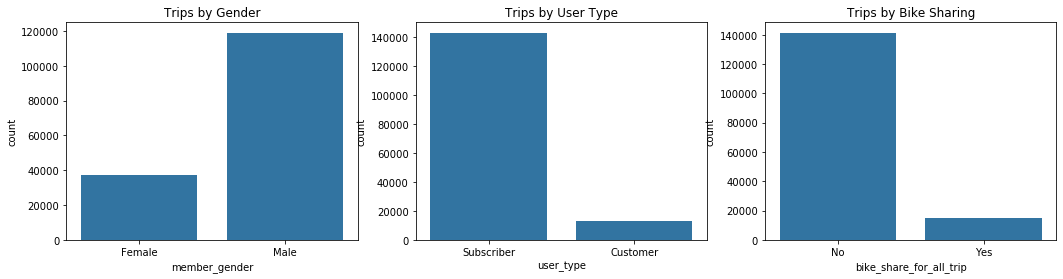

In [458]:
plt.figure(figsize=(24, 4))
plt.subplot(1, 4, 1)
sb.countplot(data=df_trips, x='member_gender', color=sb.color_palette()[0])
plt.title("Trips by Gender")

plt.subplot(1, 4, 2)
sb.countplot(data=df_trips, x='user_type', color=sb.color_palette()[0])
plt.title("Trips by User Type")

plt.subplot(1, 4, 3)
sb.countplot(data=df_trips, x='bike_share_for_all_trip', color=sb.color_palette()[0])
plt.title("Trips by Bike Sharing")

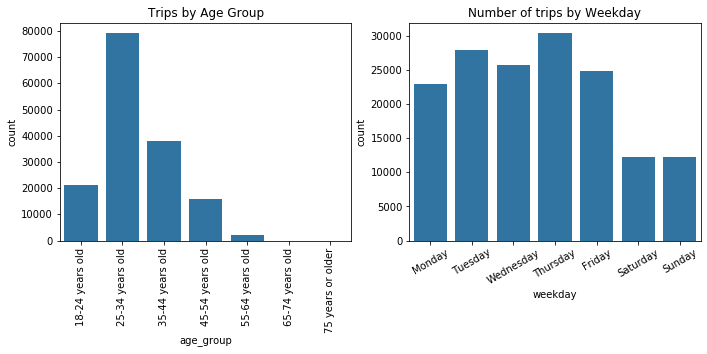

In [459]:
plt.figure(figsize=(24, 4))

# What is the number of trips by age group?
plt.subplot(1, 4, 1)
sb.countplot(data=df_trips, x='age_group', color=sb.color_palette()[0])
plt.xticks(rotation=90);
plt.title("Trips by Age Group");

plt.subplot(1, 4, 2)
sb.countplot(data=df_trips, x='weekday', color=sb.color_palette()[0])
plt.xticks(rotation=30);
plt.title("Number of trips by Weekday");

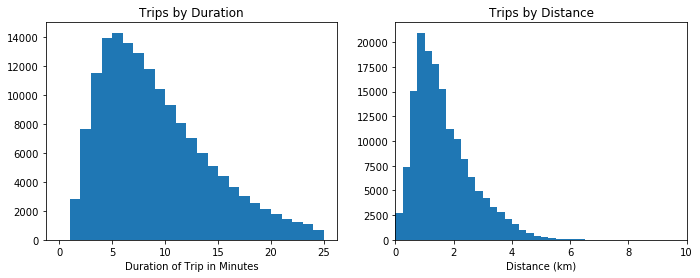

In [460]:
plt.figure(figsize=(24, 4))

plt.subplot(1, 4, 1)
bins = np.arange(0, df_trips.duration_min.max()+1, 1)
plt.hist(data = df_trips, x = 'duration_min', bins = bins);
plt.xlabel("Duration of Trip in Minutes")
#plt.yscale("log")
plt.title("Trips by Duration");

plt.subplot(1, 4, 2)
bins = np.arange(0, df_trips.distance.max()+1, 0.25)
plt.hist(data = df_trips, x = 'distance', bins = bins);
plt.xlabel("Distance (km)")
plt.title("Trips by Distance");
plt.xlim(0, 10);
#plt.yscale("log")

In [427]:
import requests
import urllib.request
import time
from urllib.request import urlopen
import geocoder
from geopy.geocoders import Nominatim

# Visualize Stations
address = 'San Francisco, California'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7790262, -122.4199061.


In [428]:
df_start_stations = df_trips[['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude']]
df_start_stations = df_start_stations.drop_duplicates()
len(df_start_stations)

329

In [429]:
top_starting_stations = df_trips.groupby('start_station_id')['start_station_name'].count().sort_values(ascending=False).head(20)
top_starting_stations

start_station_id
58.0     3406
67.0     3194
81.0     2715
21.0     2464
30.0     2366
3.0      2307
15.0     2079
22.0     2025
16.0     1975
5.0      1896
6.0      1605
243.0    1593
239.0    1591
50.0     1583
66.0     1554
27.0     1527
90.0     1419
17.0     1418
93.0     1313
44.0     1307
Name: start_station_name, dtype: int64

In [430]:
import folium # map rendering library

f = folium.Figure(width=800, height=450)

# create map of New York using latitude and longitude values
map_sanfrancisco = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, id, name in zip(df_start_stations['start_station_latitude'], df_start_stations['start_station_longitude'], df_start_stations['start_station_id'], df_start_stations['start_station_name']):
    label = '{}, {}'.format(id, name)
    label = folium.Popup(label, parse_html=True)
    if id in top_starting_stations.index:
        color = 'red'
    else:
        color = 'blue'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sanfrancisco)  
    
f.add_child(map_sanfrancisco)
f

In [431]:
df_end_stations = df_trips[['end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude']]
df_end_stations = df_end_stations.drop_duplicates()
len(df_end_stations)

329

In [432]:
top_ending_stations = df_trips.groupby('end_station_id')['end_station_name'].count().sort_values(ascending=False).head(20)
top_ending_stations

end_station_id
67.0     4436
58.0     3487
21.0     3170
30.0     2669
15.0     2615
3.0      2600
81.0     2587
16.0     2044
5.0      1930
6.0      1901
22.0     1810
27.0     1650
239.0    1586
44.0     1560
50.0     1531
66.0     1512
17.0     1397
93.0     1390
90.0     1373
182.0    1321
Name: end_station_name, dtype: int64

In [433]:
f = folium.Figure(width=800, height=450)

# create map of New York using latitude and longitude values
map_sanfrancisco = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, id, name in zip(df_end_stations['end_station_latitude'], df_end_stations['end_station_longitude'], df_end_stations['end_station_id'], df_end_stations['end_station_name']):
    label = '{}, {}'.format(id, name)
    label = folium.Popup(label, parse_html=True)
    if id in top_ending_stations.index:
        color = 'red'
    else:
        color = 'blue'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sanfrancisco)  
    
f.add_child(map_sanfrancisco)
f

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

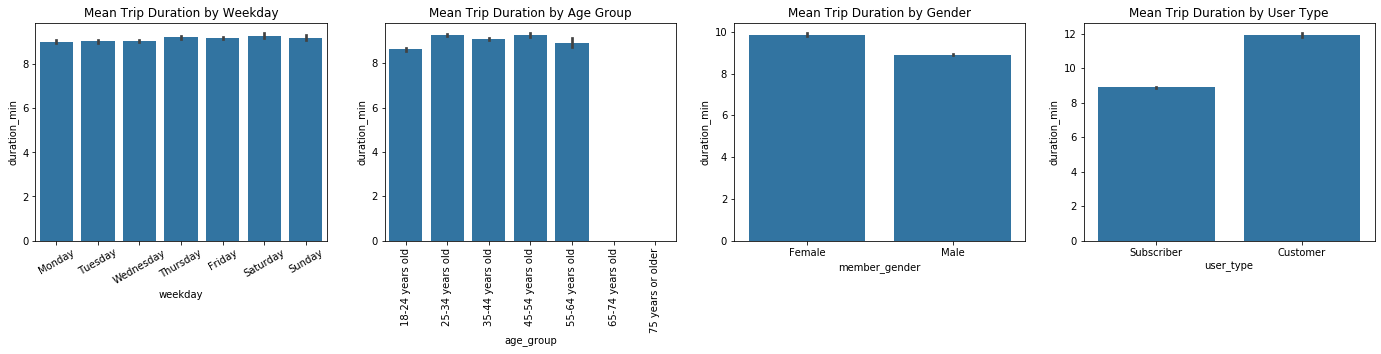

In [434]:
plt.figure(figsize=(24, 4))

plt.subplot(1,4,1)
sb.barplot(data=df_trips, x='weekday', y='duration_min', color=sb.color_palette()[0]) # Barplot shows measure of quantitative against each level of qualitative variable
plt.xticks(rotation=30);
plt.title("Mean Trip Duration by Weekday");

plt.subplot(1,4,2)
sb.barplot(data=df_trips, x='age_group', y='duration_min', color=sb.color_palette()[0])
plt.xticks(rotation=90);
plt.title("Mean Trip Duration by Age Group");

plt.subplot(1,4,3)
sb.barplot(data=df_trips, x='member_gender', y='duration_min', color=sb.color_palette()[0])
#plt.xticks(rotation=90);
plt.title("Mean Trip Duration by Gender");

plt.subplot(1,4,4)
sb.barplot(data=df_trips, x='user_type', y='duration_min', color=sb.color_palette()[0])
#plt.xticks(rotation=90);
plt.title("Mean Trip Duration by User Type");

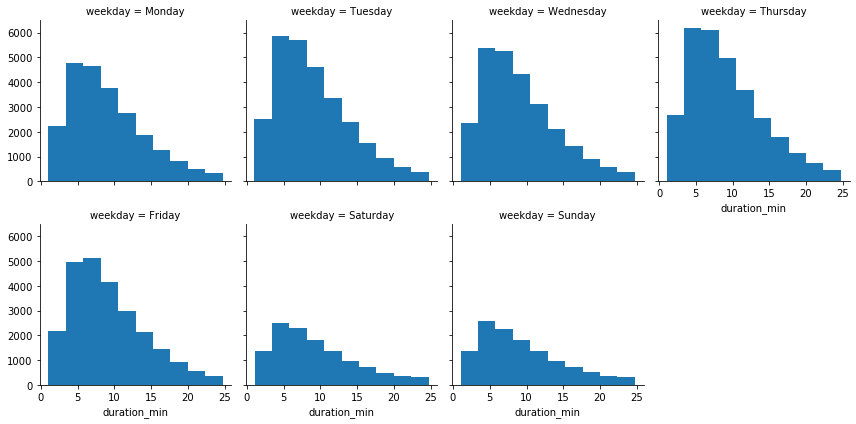

In [448]:
# Lets plot a Seaborn's FacetGrid of combined fuel ecoonmy across each class of vehicle
g = sb.FacetGrid(data = df_trips, col = 'weekday', 
                col_wrap = 4, # max 4 columns in one row
                sharey=True) # settings sharey=False can lead to visually misleading results
#bin_edges = np.arange(12, 58+2, 2) # setting bins is optional
g.map(plt.hist, "duration_min")

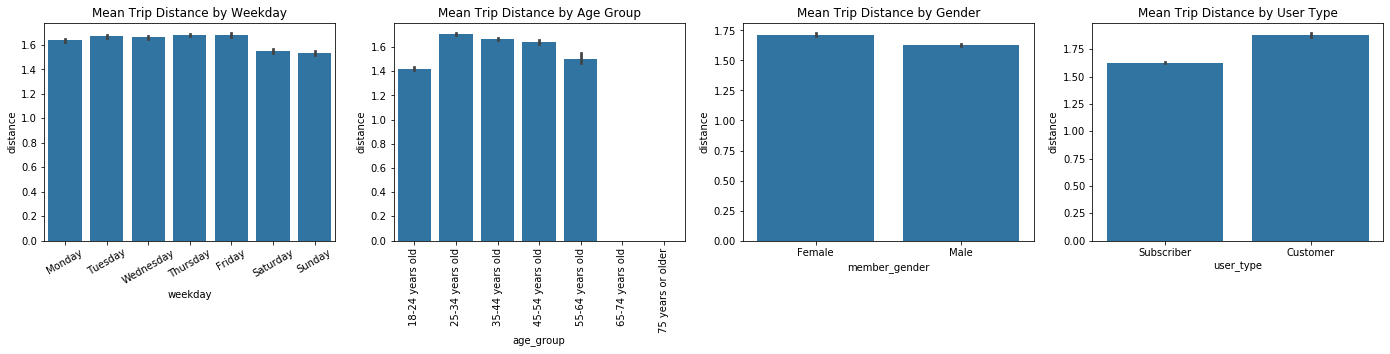

In [436]:
plt.figure(figsize=(24, 4))

plt.subplot(1,4,1)
sb.barplot(data=df_trips, x='weekday', y='distance', color=sb.color_palette()[0])
plt.xticks(rotation=30);
plt.title("Mean Trip Distance by Weekday");

plt.subplot(1,4,2)
sb.barplot(data=df_trips, x='age_group', y='distance', color=sb.color_palette()[0])
plt.xticks(rotation=90);
plt.title("Mean Trip Distance by Age Group");

plt.subplot(1,4,3)
sb.barplot(data=df_trips, x='member_gender', y='distance', color=sb.color_palette()[0])
#plt.xticks(rotation=90);
plt.title("Mean Trip Distance by Gender");

plt.subplot(1,4,4)
sb.barplot(data=df_trips, x='user_type', y='distance', color=sb.color_palette()[0])
#plt.xticks(rotation=90);
plt.title("Mean Trip Distance by User Type");

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 9 Text xticklabel objects>)

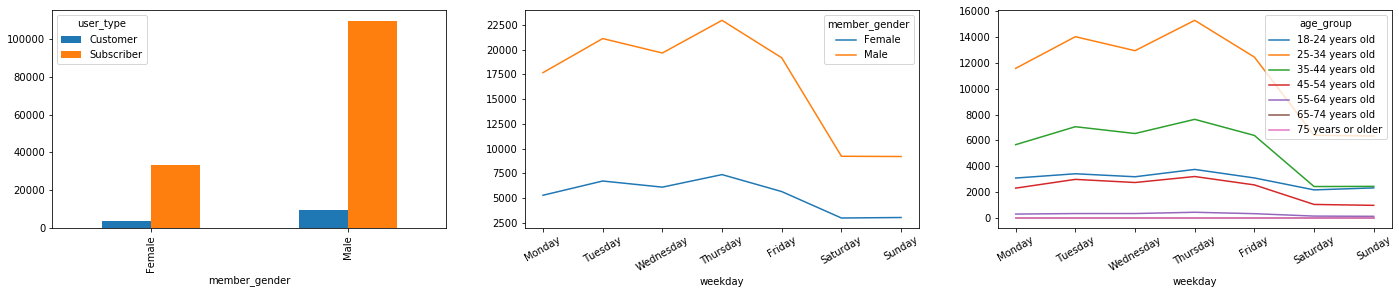

In [457]:
plt.figure(figsize=(24, 4))

ax = plt.subplot(1, 3, 1)
# Number of trips by gender and user_type
df_trips.groupby(['member_gender', 'user_type']).size().unstack().plot(kind='bar', ax=ax)

# Number of trips by weekday and user_type
ax = plt.subplot(1, 3, 2)
df_trips.groupby(['weekday', 'member_gender']).size().unstack().plot(ax = ax)
plt.xticks(rotation = 30)

# Number of trips by gender and user_type
ax = plt.subplot(1, 3, 3)
df_trips.groupby(['weekday', 'age_group']).size().unstack().plot(ax = ax)
plt.xticks(rotation = 30)

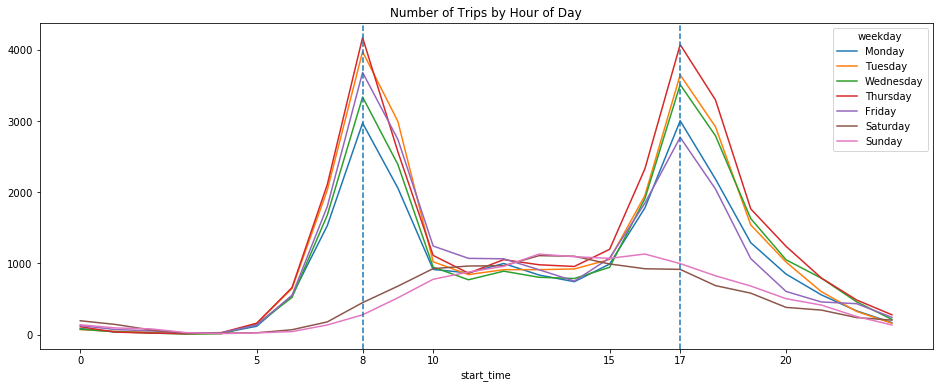

In [440]:
fig, axes = plt.subplots(ncols = 1, figsize = [16,6])

#df_group = df_trips.groupby([df_trips['start_time'].dt.hour, 'weekday'])['user_type'].count().unstack().plot()
df_trips.pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='weekday', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Number of Trips by Hour of Day", ax = axes);

plt.axvline(8, linestyle = '--')
plt.xticks([0, 5, 8, 10, 15, 17, 20])
plt.axvline(17,linestyle = '--');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

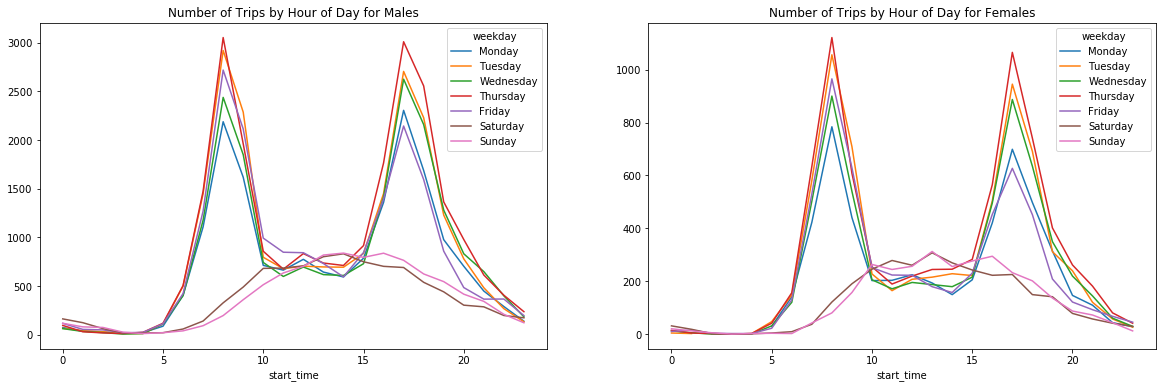

In [441]:
fig, axes = plt.subplots(ncols = 2, figsize = [20,6])

df_trips[df_trips['member_gender'] == "Male"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='weekday', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Number of Trips by Hour of Day for Males", ax = axes[0]);

df_trips[df_trips['member_gender'] == "Female"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='weekday', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Number of Trips by Hour of Day for Females", ax = axes[1]);

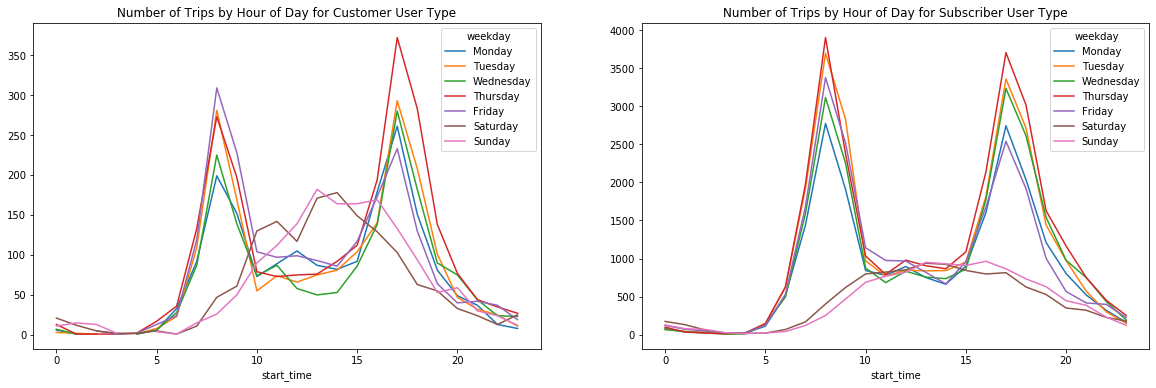

In [442]:
fig, axes = plt.subplots(ncols = 2, figsize = [20,6])

df_trips[df_trips['user_type'] == "Customer"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='weekday', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Number of Trips by Hour of Day for Customer User Type", ax = axes[0]);

df_trips[df_trips['user_type'] == "Subscriber"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='weekday', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Number of Trips by Hour of Day for Subscriber User Type", ax = axes[1]);

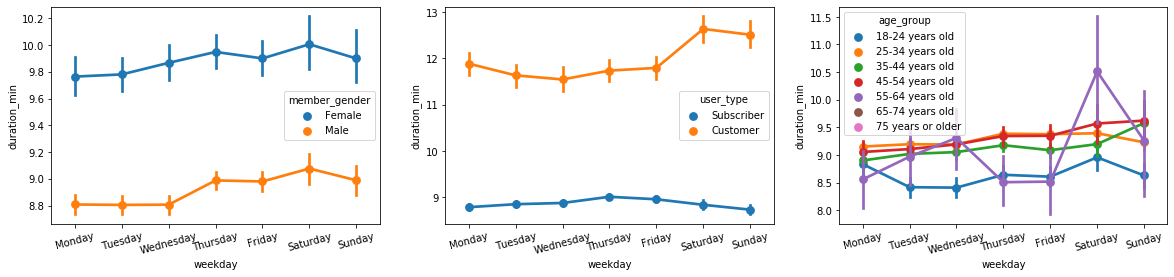

In [443]:
plt.figure(figsize=(20, 4))

plt.subplot(1,3,1)
sb.pointplot(data=df_trips, x='weekday', y='duration_min', hue='member_gender')
plt.xticks(rotation=15);

plt.subplot(1,3,2)
sb.pointplot(data=df_trips, x='weekday', y='duration_min', hue='user_type')
plt.xticks(rotation=15);

plt.subplot(1,3,3)
sb.pointplot(data=df_trips, x='weekday', y='duration_min', hue='age_group')
plt.xticks(rotation=15);

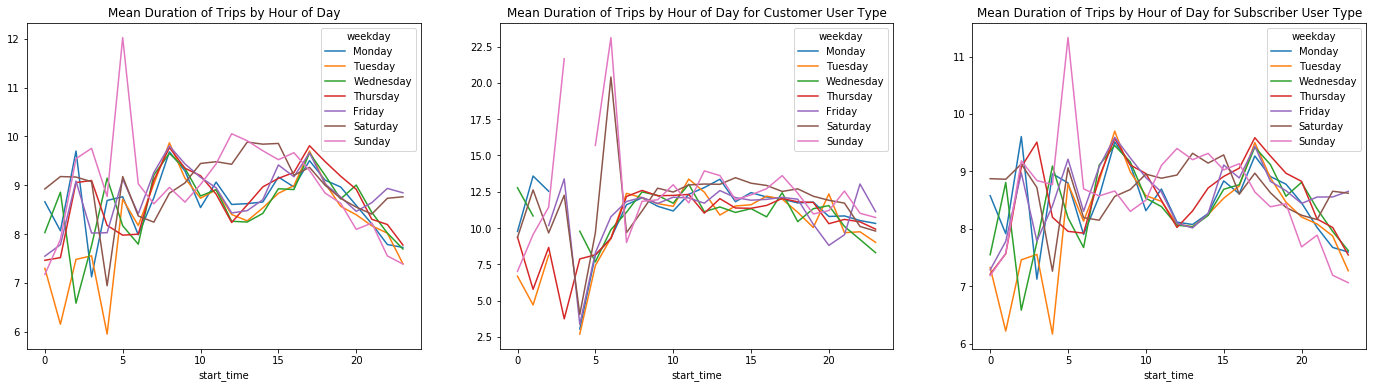

In [444]:
fig, axes = plt.subplots(ncols = 3, figsize = [24,6])

df_trips.pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='weekday', 
                     values='duration_min', 
                     aggfunc='mean').plot(title = "Mean Duration of Trips by Hour of Day", ax = axes[0])

df_trips[df_trips['user_type'] == "Customer"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='weekday', 
                     values='duration_min', 
                     aggfunc='mean').plot(title = "Mean Duration of Trips by Hour of Day for Customer User Type", ax = axes[1]);

df_trips[df_trips['user_type'] == "Subscriber"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='weekday', 
                     values='duration_min', 
                     aggfunc='mean').plot(title = "Mean Duration of Trips by Hour of Day for Subscriber User Type", ax = axes[2]);

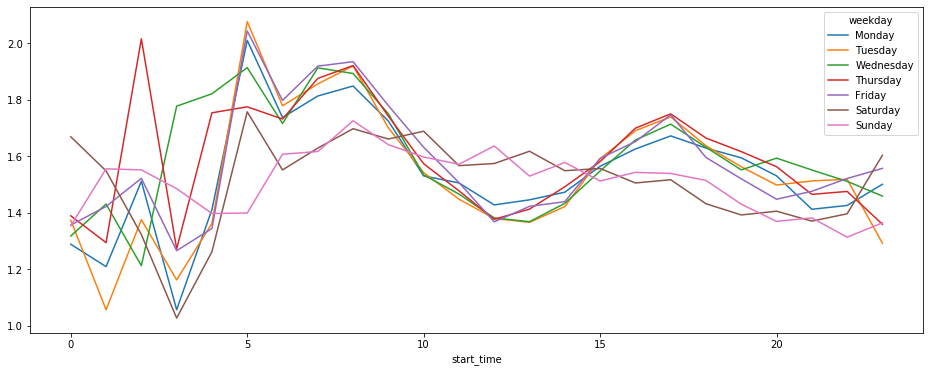

In [445]:
fig, axes = plt.subplots(ncols = 1, figsize = [16,6])

df_trips.pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='weekday', 
                     values='distance', 
                     aggfunc='mean').plot(ax = axes)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!